In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
data = pd.read_csv('DesignuebungGradingData.csv')

In [100]:
def categorize_time(time):
    if time <= 30:
        return '0-30'
    elif time <= 60:
        return '31-60'
    elif time <= 90:
        return '61-90'
    else:
        return '91+'

data['Time Category'] = data['Time to complete exam'].apply(categorize_time)

In [101]:
data['Nachklausur'] = data['Nachklausur'].str.lower()

In [102]:
data['Status'] = data['Grade'].apply(lambda x: 'Pass' if x != 5 else 'Fail')

columns = ['Time Category', 'Year', 'Nachklausur', 'Course', 'Attemptnumber', 'Study', 'Bachelor/Master']

In [103]:
colors = {'Pass': 'green', 'Fail': 'red'}

stacked_data_percent = {}
for col in columns:
    category_counts = data.groupby([col, 'Status']).size().unstack(fill_value=0)

    category_percent = category_counts.div(category_counts.sum(axis=1), axis=0) * 100
    stacked_data_percent[col] = category_percent

In [ ]:
for col, df in stacked_data_percent.items():
    df.plot(kind='barh', stacked=True, color=[colors[status] for status in df.columns],
            title=f'Percentage Stacked Bar Chart of {col}')
    plt.ylabel(col)
    plt.xlabel('Percentage of Students')
    plt.legend(loc='best')
    plt.show()

In [105]:
one_hot_data = data.drop(['Time to complete exam', 'Grade'], axis=1)

In [106]:
for col in one_hot_data.columns:
    one_hot_data[col] = one_hot_data[col].astype('category')

one_hot_data['Status'] = one_hot_data['Status'].cat.codes

one_hot_data = pd.get_dummies(one_hot_data)

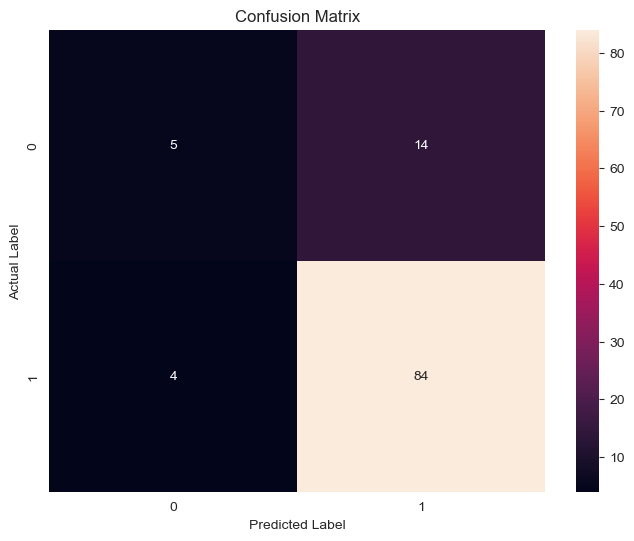

              precision    recall  f1-score   support

           0       0.56      0.26      0.36        19
           1       0.86      0.95      0.90        88

    accuracy                           0.83       107
   macro avg       0.71      0.61      0.63       107
weighted avg       0.80      0.83      0.81       107


,Coefficient
Year_2021,0.169450
Year_2022,-0.391966
Year_2023,0.222530
Nachklausur_no,-0.056967
Nachklausur_yes,0.056981
Course_VA,0.001437
Course_Vis,-0.001422
Attemptnumber_1,0.552041
Attemptnumber_2,0.009572
Attemptnumber_3,-0.561599


In [107]:
X = one_hot_data.drop('Status', axis=1)
y = one_hot_data['Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

print(class_report)

coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients

### Model Coefficients

The coefficients indicate the relationship between each feature and the likelihood of passing (positive coefficients) or failing (negative coefficients). In the model:

- **Strong Negative Impact on passing:** Time Category_0-30 (strongest impact, indicating that completing the exam very quickly increases the chance of failing).
- **Positive Impact on passing:** Time Category_31-60 and Time Category_61-90 (longer time categories are positively associated with passing).
- **Other Notable Coefficients:**
    - Year_2022 has a negative impact, while Year_2023 and Year_2021 have a positive impact on passing.
    - Attemptnumber_1 positively correlates with passing, while Attemptnumber_3 has a negative correlation.
    - Bachelor/Master_Bachelor has a positive impact, while Bachelor/Master_Master has a negative impact.

### Interpretation

- The most influential factor appears to be the time category, particularly the **Time Category_0-30**, which is strongly negatively correlated with passing.
- The year of the exam, the number of attempts, and the level of the degree (Bachelor/Master) also play a role but are less impactful than the time taken for the exam.

### Attributes that should be used for the visualisation

- **Time to complete exam**
- **Year**
- **Attemptnumber**
- **Bachelor/Master**

In [108]:
df = pd.read_csv('DesignuebungGradingData.csv')

selected_columns = ['Time to complete exam', 'Year', 'Grade', 'Attemptnumber', 'Bachelor/Master']
selected_df = df[selected_columns]

selected_df.to_csv('FilteredGradingData.csv', index=False)